**Ironhack Final Project**

---

**Notebook 00 - downloads**

---

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import tools.cleaning as clean
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# EDA

In [11]:
barcelona_EEA = pd.read_csv('../data/EEA/barcelona/PM2/barcelona_combined.csv')
barcelona_EEA.sample()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
5126,ES,ES.BDCA.AQD,NET_ES209A,STA_ES0567A,ES0567A,SP_08019045_9_M,SPP_08019045_9_M.1,SAM_08019045_9_M,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,12.4,µg/m3,2014-08-27 00:00:00 +01:00,2014-08-28 00:00:00 +01:00,1,1


In [12]:
barcelona_EEA['Countrycode'].unique() #'ES' (only one -drop column)

array(['ES'], dtype=object)

In [13]:
barcelona_EEA['Namespace'].unique() #'ES.BDCA.AQD' (only one -drop column)

array(['ES.BDCA.AQD'], dtype=object)

In [14]:
barcelona_EEA['AirQualityNetwork'].unique() #'NET_ES209A' (only one -drop column)

array(['NET_ES209A'], dtype=object)

In [15]:
barcelona_EEA['AirQualityStation'].unique()

array(['STA_ES1438A', 'STA_ES1148A', 'STA_ES0567A', 'STA_ES0559A',
       'STA_ES1453A', 'STA_ES1983A', 'STA_ES0692A', 'STA_ES1262A',
       'STA_ES0700A', 'STA_ES1684A', 'STA_ES1480A', 'STA_ES1856A',
       'STA_ES1852A', 'STA_ES0691A'], dtype=object)

In [16]:
barcelona_EEA['AirQualityStationEoICode'].unique()

array(['ES1438A', 'ES1148A', 'ES0567A', 'ES0559A', 'ES1453A', 'ES1983A',
       'ES0692A', 'ES1262A', 'ES0700A', 'ES1684A', 'ES1480A', 'ES1856A',
       'ES1852A', 'ES0691A'], dtype=object)

In [17]:
barcelona_EEA['SamplingPoint'].unique()

array(['SP_08019043_9_M', 'SP_08194008_9_M', 'SP_08019045_9_M',
       'SP_08019028_9_M', 'SP_08245012_9_M', 'SP_08169009_9_M',
       'SP_08101001_9_M', 'SP_08187012_9_M', 'SP_08252002_9_M',
       'SP_08184006_9_M', 'SP_08019044_9_M', 'SP_08019054_9_M',
       'SP_08019053_9_M', 'SP_08019004_9_M'], dtype=object)

In [18]:
barcelona_EEA['SamplingProcess'].unique()

array(['SPP_08019043_9_M.1', 'SPP_08194008_9_M.1', 'SPP_08019045_9_M.1',
       'SPP_08019028_9_M.1', 'SPP_08245012_9_M.1', 'SPP_08169009_9_M.1',
       'SPP_08101001_9_M.1', 'SPP_08187012_9_M.1', 'SPP_08252002_9_M.1',
       'SPP_08184006_9_M.1', 'SPP_08019044_9_M.1', 'SPP_08019054_9_M.1',
       'SPP_08019053_9_M.1', 'SPP_08019004_9_M.1'], dtype=object)

In [19]:
barcelona_EEA['Sample'].unique() # Contains same info as SamplingPoint -dropcolumn

array(['SAM_08019043_9_M', 'SAM_08194008_9_M', 'SAM_08019045_9_M',
       'SAM_08019028_9_M', 'SAM_08245012_9_M', 'SAM_08169009_9_M',
       'SAM_08101001_9_M', 'SAM_08187012_9_M', 'SAM_08252002_9_M',
       'SAM_08184006_9_M', 'SAM_08019044_9_M', 'SAM_08019054_9_M',
       'SAM_08019053_9_M', 'SAM_08019004_9_M'], dtype=object)

In [20]:
barcelona_EEA['AirPollutant'].unique()

array(['PM2.5'], dtype=object)

In [12]:
barcelona_EEA['AirPollutantCode'].unique() #'http://dd.eionet.europa.eu/vocabulary/aq/pollutant/6001' (only one -drop column)

array(['http://dd.eionet.europa.eu/vocabulary/aq/pollutant/6001'],
      dtype=object)

In [13]:
barcelona_EEA['AveragingTime'].unique() #'day'(only one -drop column)

array(['day'], dtype=object)

In [14]:
barcelona_EEA['UnitOfMeasurement'].unique() #'µg/m3' (only one -drop column)

array(['µg/m3'], dtype=object)

In [15]:
barcelona_EEA['Validity'].unique() #-1 if NaN, 1 if not NaN

array([ 1, -1], dtype=int64)

In [16]:
barcelona_EEA['Verification'].unique() #1 (only one -drop column)

array([1], dtype=int64)

In [17]:
# Dropping columns to make it cleaner
columns_drop = ['Countrycode', 'Namespace', 'Sample', 'AirQualityNetwork', 'AirPollutantCode', 'AveragingTime', 'UnitOfMeasurement', 'DatetimeBegin', 'Verification']
barcelona_EEA_clean = clean.drop_columns(barcelona_EEA, columns_drop)
# Transform to datetime
barcelona_EEA_clean = clean.transform_datetime(barcelona_EEA_clean, 'DatetimeEnd')

In [18]:
barcelona_EEA_clean.head()

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-10-20 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,14.2,1
2013-01-08 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2013-10-18 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,16.4,1
2013-10-23 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,20.9,1
2013-10-17 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,19.6,1


In [19]:
STA_ES1438A = barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES1438A']

In [20]:
STA_ES1438A = STA_ES1438A.sort_values(by='Datetime',ascending=True)

In [21]:
STA_ES1438A

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-01-02 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,17.3,1
2013-01-03 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,22.7,1
2013-01-04 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,23.7,1
2013-01-05 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,29.0,1
2013-01-06 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,33.8,1
...,...,...,...,...,...,...,...
2020-12-28 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,8.0,1
2020-12-29 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,12.5,1
2020-12-30 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,8.0,1


In [26]:
STA_ES1438A.isna().sum()

AirQualityStation            0
AirQualityStationEoICode     0
SamplingPoint                0
SamplingProcess              0
AirPollutant                 0
Concentration               70
Validity                     0
dtype: int64

In [27]:
STA_ES1438A[STA_ES1438A.isnull().any(axis=1)]

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-01-08 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2013-01-17 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2013-01-22 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2013-04-05 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2013-04-06 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
...,...,...,...,...,...,...,...
2020-09-01 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2020-11-16 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1
2020-11-17 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,NaN,-1


In [77]:
STA_ES1438A = STA_ES1438A.fillna(STA_ES1438A["Concentration"].mean())

In [78]:
STA_ES1438A.isna().sum()

AirQualityStation           0
AirQualityStationEoICode    0
SamplingPoint               0
SamplingProcess             0
AirPollutant                0
Concentration               0
Validity                    0
dtype: int64

In [79]:
STA_ES1438A.index

DatetimeIndex(['2013-01-02 00:00:00+01:00', '2013-01-03 00:00:00+01:00',
               '2013-01-04 00:00:00+01:00', '2013-01-05 00:00:00+01:00',
               '2013-01-06 00:00:00+01:00', '2013-01-07 00:00:00+01:00',
               '2013-01-08 00:00:00+01:00', '2013-01-09 00:00:00+01:00',
               '2013-01-10 00:00:00+01:00', '2013-01-11 00:00:00+01:00',
               ...
               '2020-12-23 00:00:00+01:00', '2020-12-24 00:00:00+01:00',
               '2020-12-25 00:00:00+01:00', '2020-12-26 00:00:00+01:00',
               '2020-12-27 00:00:00+01:00', '2020-12-28 00:00:00+01:00',
               '2020-12-29 00:00:00+01:00', '2020-12-30 00:00:00+01:00',
               '2020-12-31 00:00:00+01:00', '2021-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='Datetime', length=2818, freq=None)

In [102]:
STA_ES1438A = STA_ES1438A.asfreq('D')

In [104]:
STA_ES1438A

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity,year
Datetime,,,,,,,,
2013-01-02 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,17.3,1.0,2013.0
2013-01-03 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,22.7,1.0,2013.0
2013-01-04 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,23.7,1.0,2013.0
2013-01-05 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,29.0,1.0,2013.0
2013-01-06 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,33.8,1.0,2013.0
...,...,...,...,...,...,...,...,...
2020-12-28 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,8.0,1.0,2020.0
2020-12-29 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,12.5,1.0,2020.0
2020-12-30 00:00:00+01:00,STA_ES1438A,ES1438A,SP_08019043_9_M,SPP_08019043_9_M.1,PM2.5,8.0,1.0,2020.0


In [105]:
STA_ES1438A.index

DatetimeIndex(['2013-01-02 00:00:00+01:00', '2013-01-03 00:00:00+01:00',
               '2013-01-04 00:00:00+01:00', '2013-01-05 00:00:00+01:00',
               '2013-01-06 00:00:00+01:00', '2013-01-07 00:00:00+01:00',
               '2013-01-08 00:00:00+01:00', '2013-01-09 00:00:00+01:00',
               '2013-01-10 00:00:00+01:00', '2013-01-11 00:00:00+01:00',
               ...
               '2020-12-23 00:00:00+01:00', '2020-12-24 00:00:00+01:00',
               '2020-12-25 00:00:00+01:00', '2020-12-26 00:00:00+01:00',
               '2020-12-27 00:00:00+01:00', '2020-12-28 00:00:00+01:00',
               '2020-12-29 00:00:00+01:00', '2020-12-30 00:00:00+01:00',
               '2020-12-31 00:00:00+01:00', '2021-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='Datetime', length=2922, freq='D')

In [106]:
freq = pd.infer_freq(STA_ES1438A.index)
freq

'D'

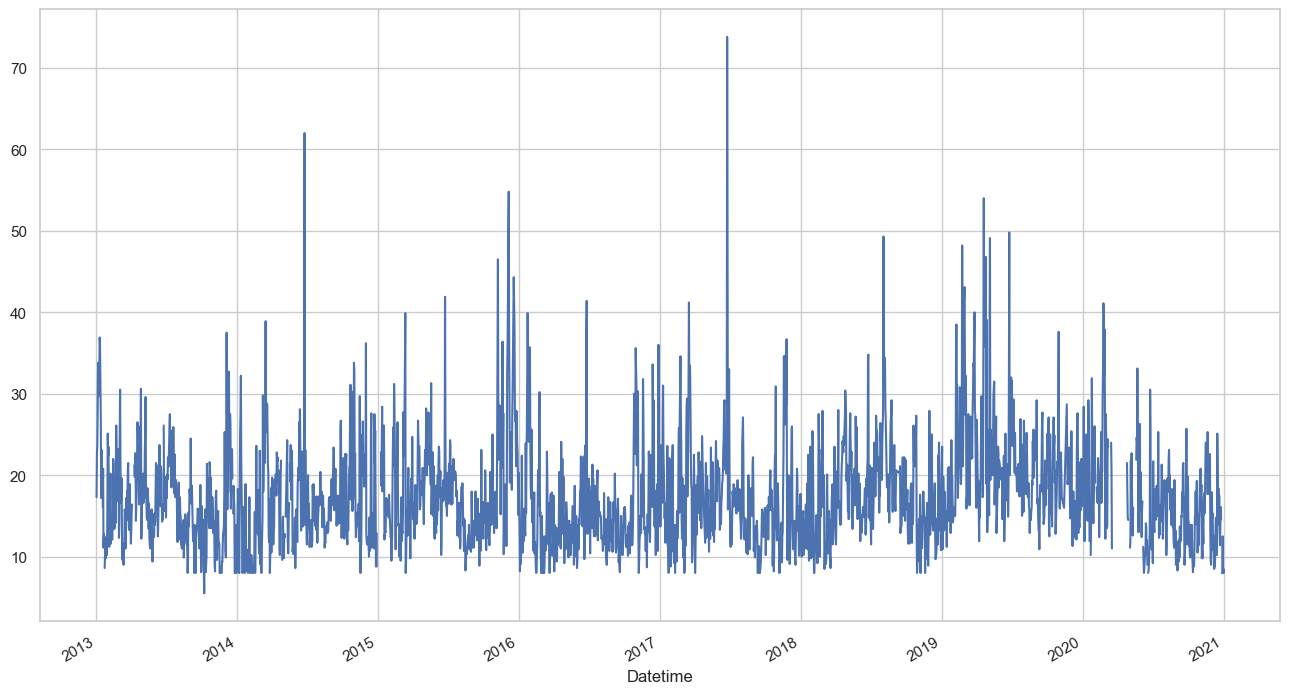

In [19]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES1438A']['Concentration'].plot();

In [110]:
STA_ES1438A.isna().sum()

AirQualityStation           104
AirQualityStationEoICode    104
SamplingPoint               104
SamplingProcess             104
AirPollutant                104
Concentration               104
Validity                    104
year                        104
dtype: int64

In [111]:
STA_ES1438A = STA_ES1438A.fillna(STA_ES1438A["Concentration"].mean())

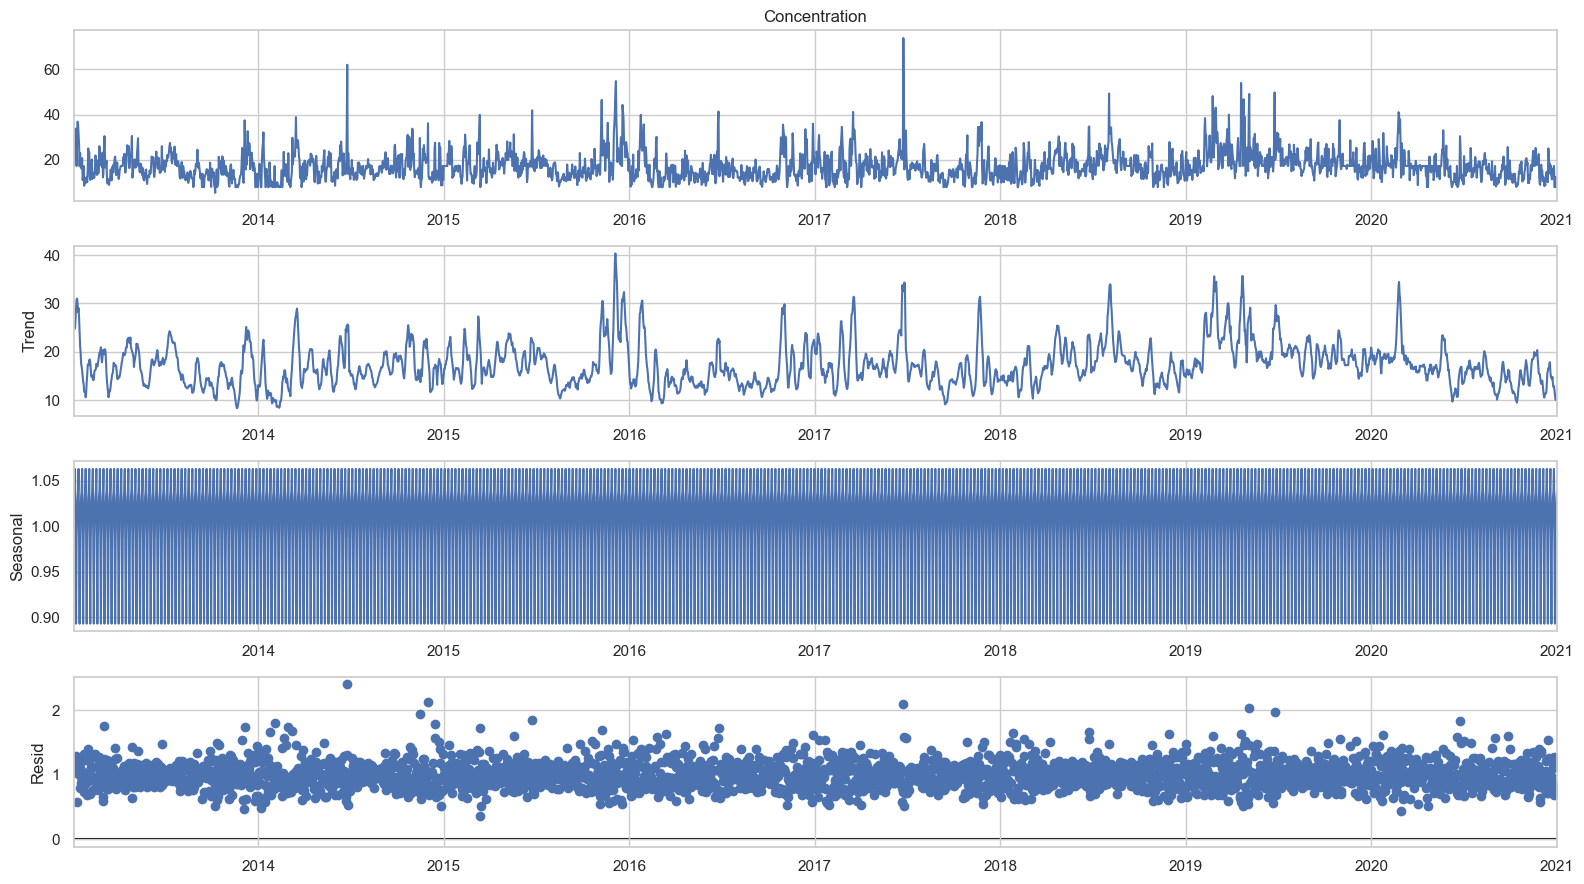

In [113]:
res = seasonal_decompose(STA_ES1438A['Concentration'], model="multiplicative")
res.plot();

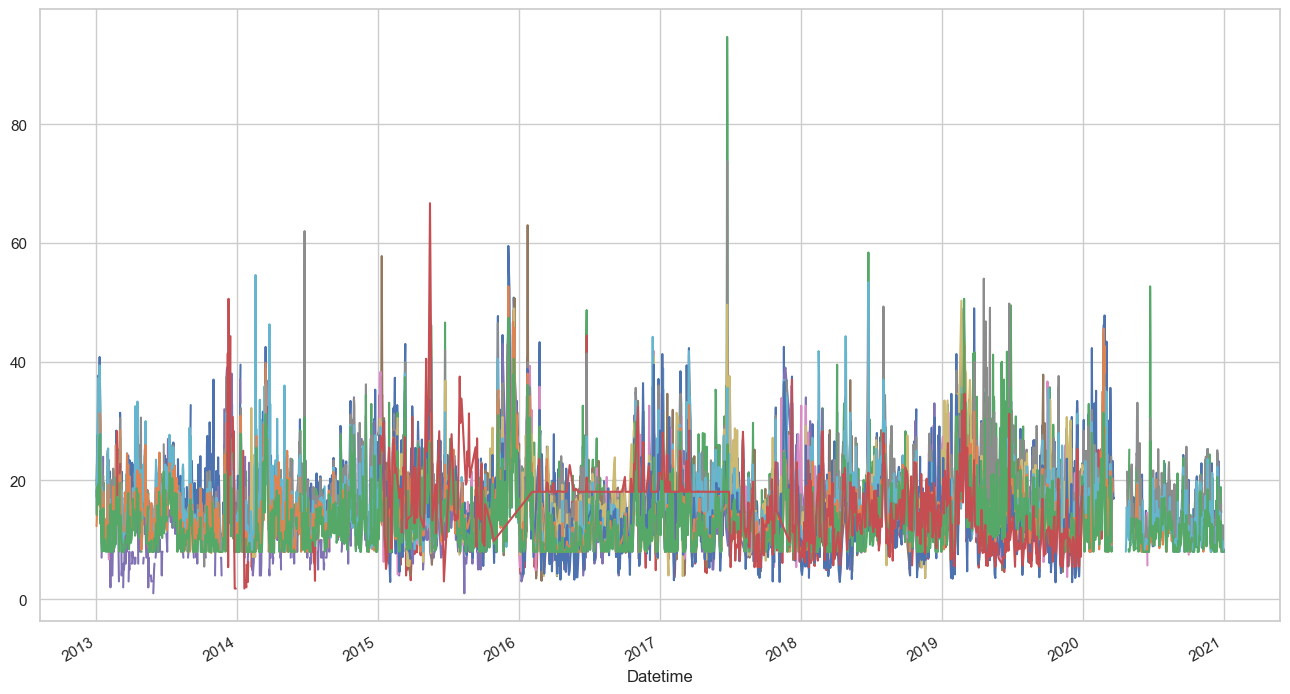

In [29]:
barcelona_EEA_clean.groupby('AirQualityStation')['Concentration'].plot();

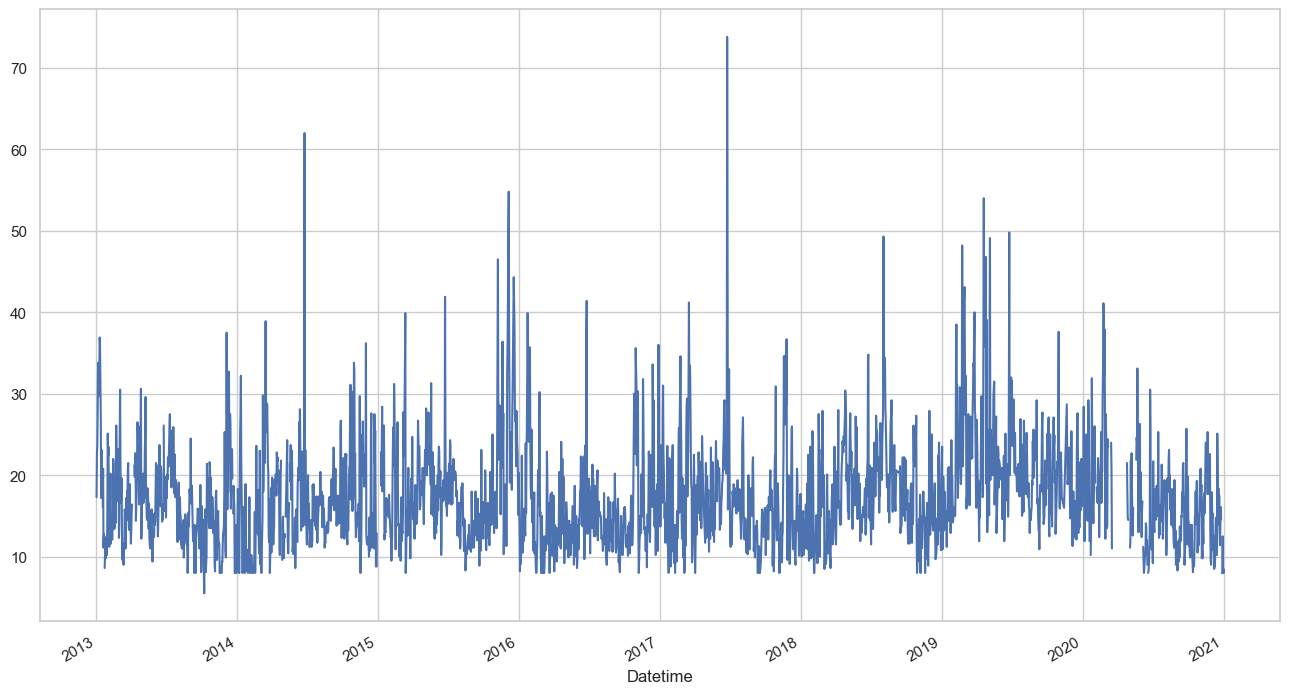

In [115]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES1438A']['Concentration'].plot();

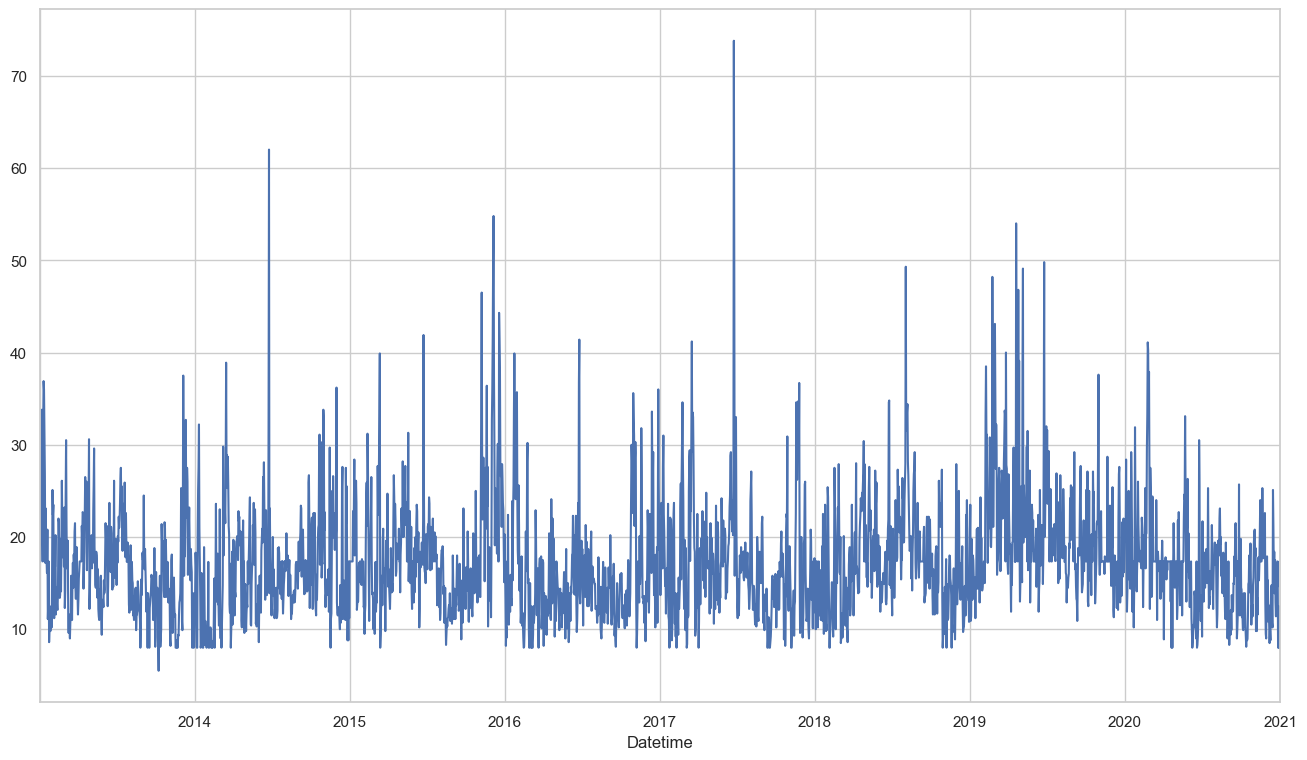

In [114]:
STA_ES1438A['Concentration'].plot();

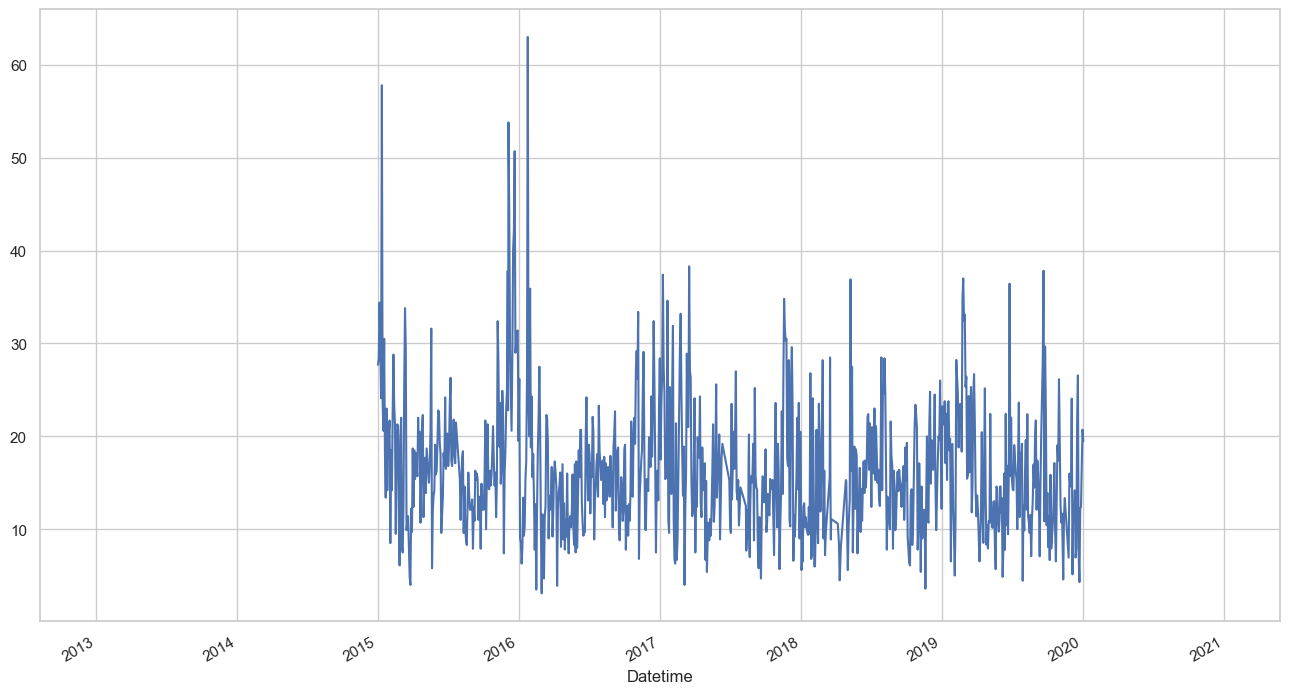

In [24]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES1148A']['Concentration'].plot();

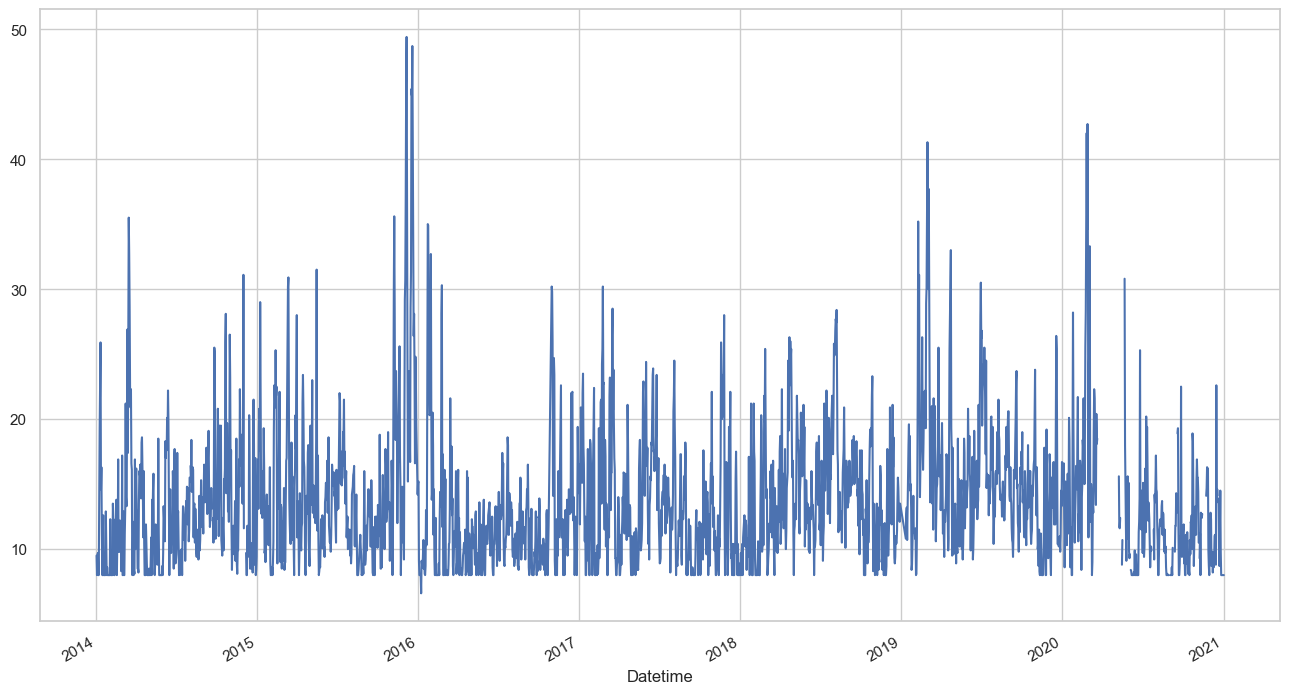

In [25]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES0567A']['Concentration'].plot();

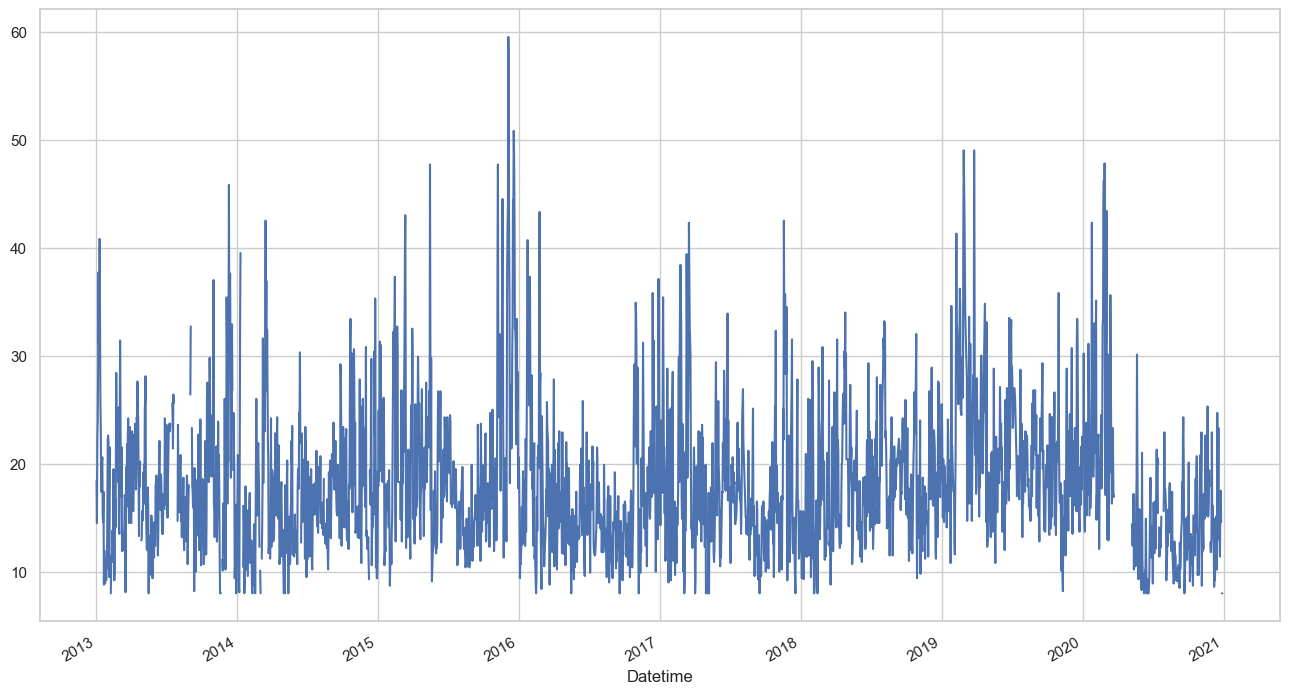

In [26]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES0559A']['Concentration'].plot();

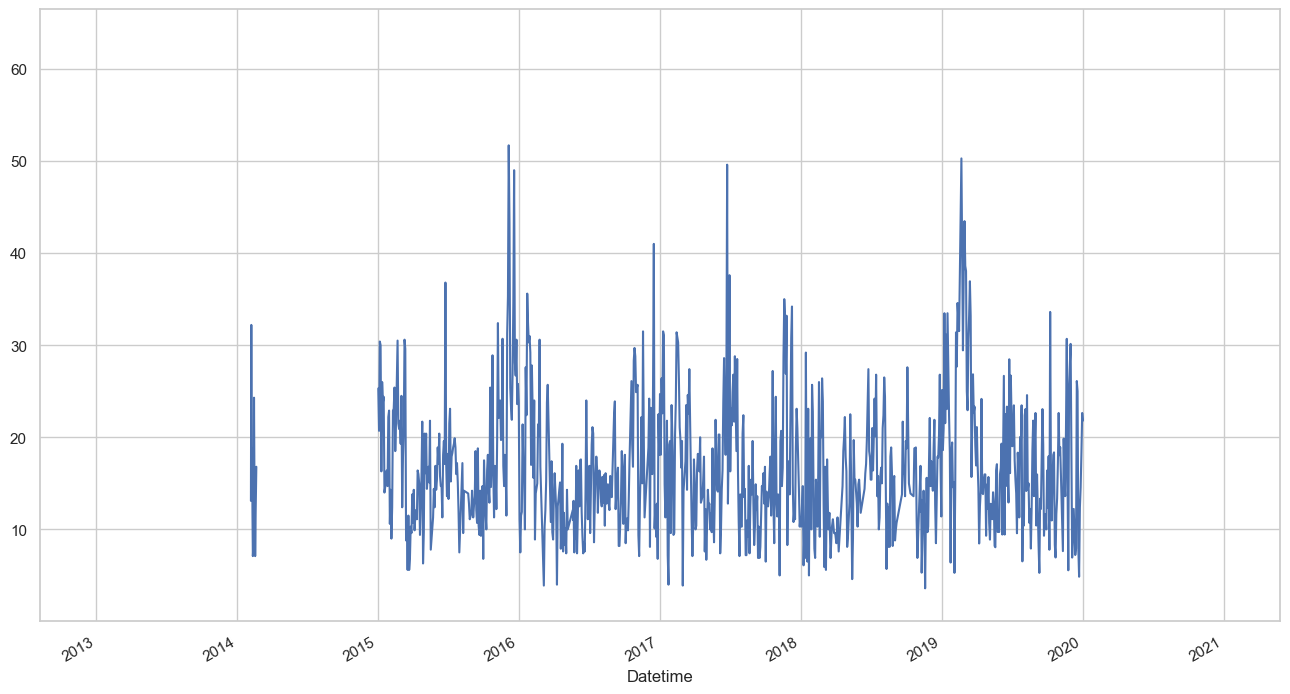

In [27]:
barcelona_EEA_clean[barcelona_EEA_clean['AirQualityStation']=='STA_ES1453A']['Concentration'].plot();

In [28]:
barcelona_EEA['AirQualityStation'].unique()

array(['STA_ES1438A', 'STA_ES1148A', 'STA_ES0567A', 'STA_ES0559A',
       'STA_ES1453A', 'STA_ES1983A', 'STA_ES0692A', 'STA_ES1262A',
       'STA_ES0700A', 'STA_ES1684A', 'STA_ES1480A', 'STA_ES1856A',
       'STA_ES1852A', 'STA_ES0691A'], dtype=object)

## PM10

In [31]:
barcelona_EEA_pm10 = pd.read_csv('../data/EEA/barcelona/PM10/barcelona_combined_pm10.csv')
barcelona_EEA_pm10.sample()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
110706,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,SAM_08184006_10_47,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,22.0,µg/m3,2019-12-26 22:00:00 +01:00,2019-12-26 23:00:00 +01:00,1,1


In [32]:
# Dropping columns to make it cleaner
columns_drop = ['Countrycode', 'Namespace', 'Sample', 'AirQualityNetwork', 'AirPollutantCode', 'AveragingTime', 'UnitOfMeasurement', 'DatetimeBegin', 'Verification']
barcelona_EEA_pm10_clean = clean.drop_columns(barcelona_EEA_pm10, columns_drop)
# Transform to datetime
barcelona_EEA_pm10_clean = clean.transform_datetime(barcelona_EEA_pm10_clean, 'DatetimeEnd')

In [34]:
barcelona_EEA_pm10_clean.head()

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-10-17 00:00:00+01:00,STA_ES2027A,ES2027A,SP_08015023_10_M,SPP_08015023_10_M.1,PM10,NaN,-1
2013-10-18 00:00:00+01:00,STA_ES2027A,ES2027A,SP_08015023_10_M,SPP_08015023_10_M.1,PM10,NaN,-1
2013-03-11 00:00:00+01:00,STA_ES2027A,ES2027A,SP_08015023_10_M,SPP_08015023_10_M.1,PM10,9.0,1
2013-02-18 00:00:00+01:00,STA_ES2027A,ES2027A,SP_08015023_10_M,SPP_08015023_10_M.1,PM10,14.0,1
2013-02-08 00:00:00+01:00,STA_ES2027A,ES2027A,SP_08015023_10_M,SPP_08015023_10_M.1,PM10,9.0,1


In [37]:
barcelona_EEA_pm10_clean.sort_values(by='Datetime',ascending=True)

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-01-02 00:00:00+01:00,STA_ES0559A,ES0559A,SP_08019028_10_M,SPP_08019028_10_M.1,PM10,20.8,1
2013-01-02 00:00:00+01:00,STA_ES1900A,ES1900A,SP_08019055_10_M,SPP_08019055_10_M.1,PM10,20.2,1
2013-01-02 00:00:00+01:00,STA_ES0691A,ES0691A,SP_08019004_10_M,SPP_08019004_10_M.1,PM10,24.8,1
2013-01-02 00:00:00+01:00,STA_ES1362A,ES1362A,SP_08211003_10_M,SPP_08211003_10_M.1,PM10,NaN,-1
2013-01-02 00:00:00+01:00,STA_ES1396A,ES1396A,SP_08019042_10_M,SPP_08019042_10_M.1,PM10,25.9,1
...,...,...,...,...,...,...,...
2021-01-01 00:00:00+01:00,STA_ES1480A,ES1480A,SP_08019044_10_M,SPP_08019044_10_M.1,PM10,NaN,-1
2021-01-01 00:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_10_M,SPP_08169009_10_M.1,PM10,NaN,-1
2021-01-01 00:00:00+01:00,STA_ES1900A,ES1900A,SP_08019055_10_M,SPP_08019055_10_M.1,PM10,11.7,1


In [38]:
barcelona_EEA_pm10_clean.isna().sum()

AirQualityStation               0
AirQualityStationEoICode        0
SamplingPoint                   0
SamplingProcess                 0
AirPollutant                    0
Concentration               11429
Validity                        0
dtype: int64

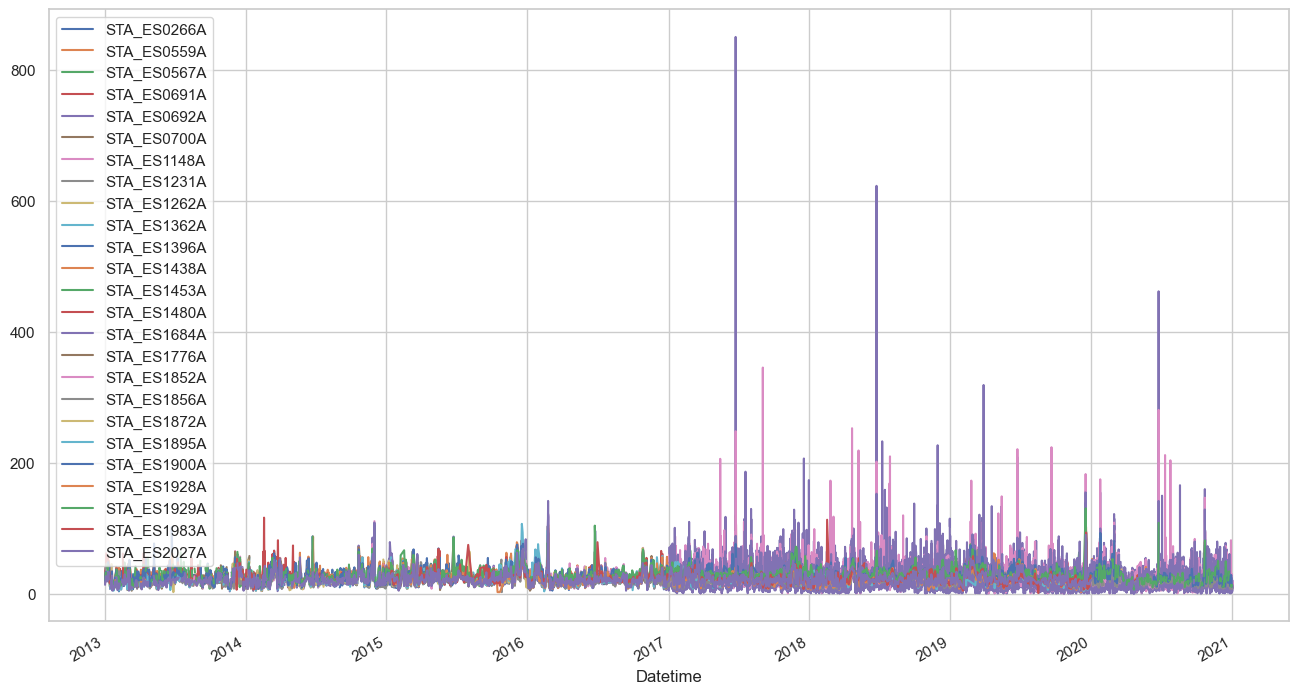

In [36]:
barcelona_EEA_pm10_clean.groupby('AirQualityStation')['Concentration'].plot()
plt.legend();

In [42]:
barcelona_EEA_pm10_clean.groupby('AirQualityStation').size()

AirQualityStation
STA_ES0266A     1195
STA_ES0559A     2882
STA_ES0567A     2886
STA_ES0691A     2874
STA_ES0692A    36354
STA_ES0700A     1328
STA_ES1148A    36346
STA_ES1231A     2121
STA_ES1262A     1932
STA_ES1362A     1318
STA_ES1396A     2797
STA_ES1438A     2892
STA_ES1453A     1961
STA_ES1480A     2829
STA_ES1684A    36360
STA_ES1776A      927
STA_ES1852A     2110
STA_ES1856A     2879
STA_ES1872A      910
STA_ES1895A     1456
STA_ES1900A     2637
STA_ES1928A     1607
STA_ES1929A     2062
STA_ES1983A     1823
STA_ES2027A     2550
dtype: int64

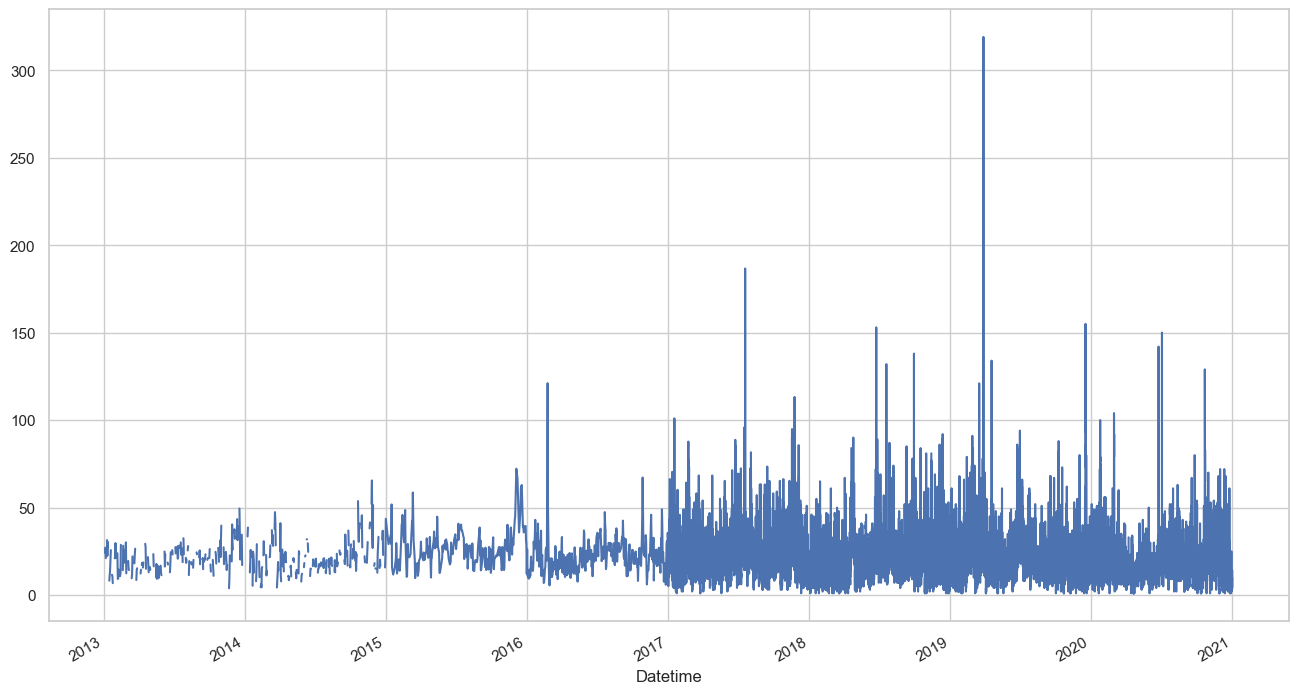

In [43]:
barcelona_EEA_pm10_clean[barcelona_EEA_pm10_clean['AirQualityStation']=='STA_ES1684A']['Concentration'].plot();

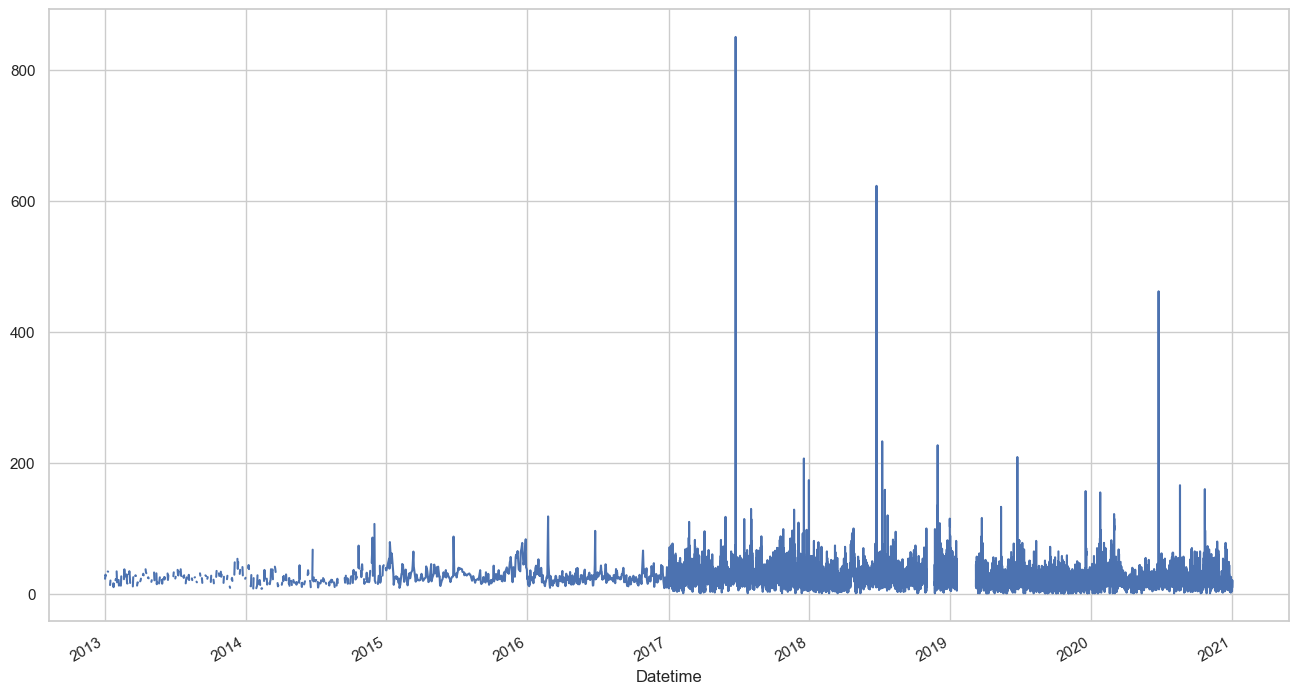

In [44]:
barcelona_EEA_pm10_clean[barcelona_EEA_pm10_clean['AirQualityStation']=='STA_ES0692A']['Concentration'].plot();

In [52]:
bcn_pm10_2017_2020 = barcelona_EEA_pm10_clean['2017':'2020']

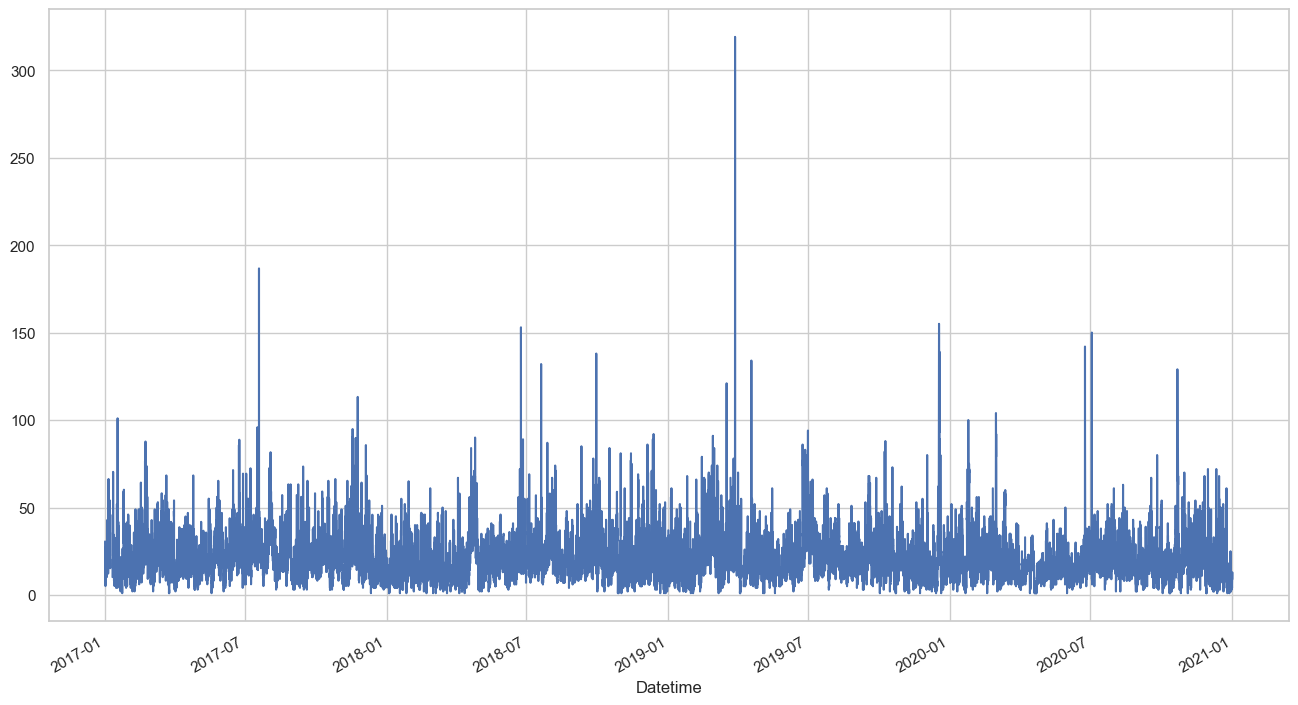

In [53]:
bcn_pm10_2017_2020[bcn_pm10_2017_2020['AirQualityStation']=='STA_ES1684A']['Concentration'].plot();

In [54]:
STA_ES1684A_pm10_2017_2020 = bcn_pm10_2017_2020[bcn_pm10_2017_2020['AirQualityStation']=='STA_ES1684A']

In [58]:
STA_ES1684A_pm10_2017_2020.isna().sum()

AirQualityStation             0
AirQualityStationEoICode      0
SamplingPoint                 0
SamplingProcess               0
AirPollutant                  0
Concentration               721
Validity                      0
dtype: int64

In [60]:
STA_ES1684A_pm10_2017_2020['Concentration'] = STA_ES1684A_pm10_2017_2020['Concentration'].interpolate()

C:\Users\mplan\AppData\Local\Temp\ipykernel_3784\4174741506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STA_ES1684A_pm10_2017_2020['Concentration'] = STA_ES1684A_pm10_2017_2020['Concentration'].interpolate()


In [61]:
STA_ES1684A_pm10_2017_2020.isna().sum()

AirQualityStation           0
AirQualityStationEoICode    0
SamplingPoint               0
SamplingProcess             0
AirPollutant                0
Concentration               0
Validity                    0
dtype: int64

In [62]:
STA_ES1684A_pm10_2017_2020.index

DatetimeIndex(['2017-01-01 00:00:00+01:00', '2017-01-01 02:00:00+01:00',
               '2017-01-01 03:00:00+01:00', '2017-01-01 04:00:00+01:00',
               '2017-01-01 05:00:00+01:00', '2017-01-01 06:00:00+01:00',
               '2017-01-01 07:00:00+01:00', '2017-01-01 08:00:00+01:00',
               '2017-01-01 09:00:00+01:00', '2017-01-01 10:00:00+01:00',
               ...
               '2020-12-31 14:00:00+01:00', '2020-12-31 15:00:00+01:00',
               '2020-12-31 16:00:00+01:00', '2020-12-31 17:00:00+01:00',
               '2020-12-31 18:00:00+01:00', '2020-12-31 19:00:00+01:00',
               '2020-12-31 20:00:00+01:00', '2020-12-31 21:00:00+01:00',
               '2020-12-31 22:00:00+01:00', '2020-12-31 23:00:00+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='Datetime', length=35061, freq=None)

In [64]:
STA_ES1684A_pm10_2017_2020 = STA_ES1684A_pm10_2017_2020.asfreq('D')

In [65]:
pd.infer_freq(STA_ES1684A_pm10_2017_2020.index)

'D'

In [66]:
STA_ES1684A_pm10_2017_2020.isna().sum()

AirQualityStation           0
AirQualityStationEoICode    0
SamplingPoint               0
SamplingProcess             0
AirPollutant                0
Concentration               0
Validity                    0
dtype: int64

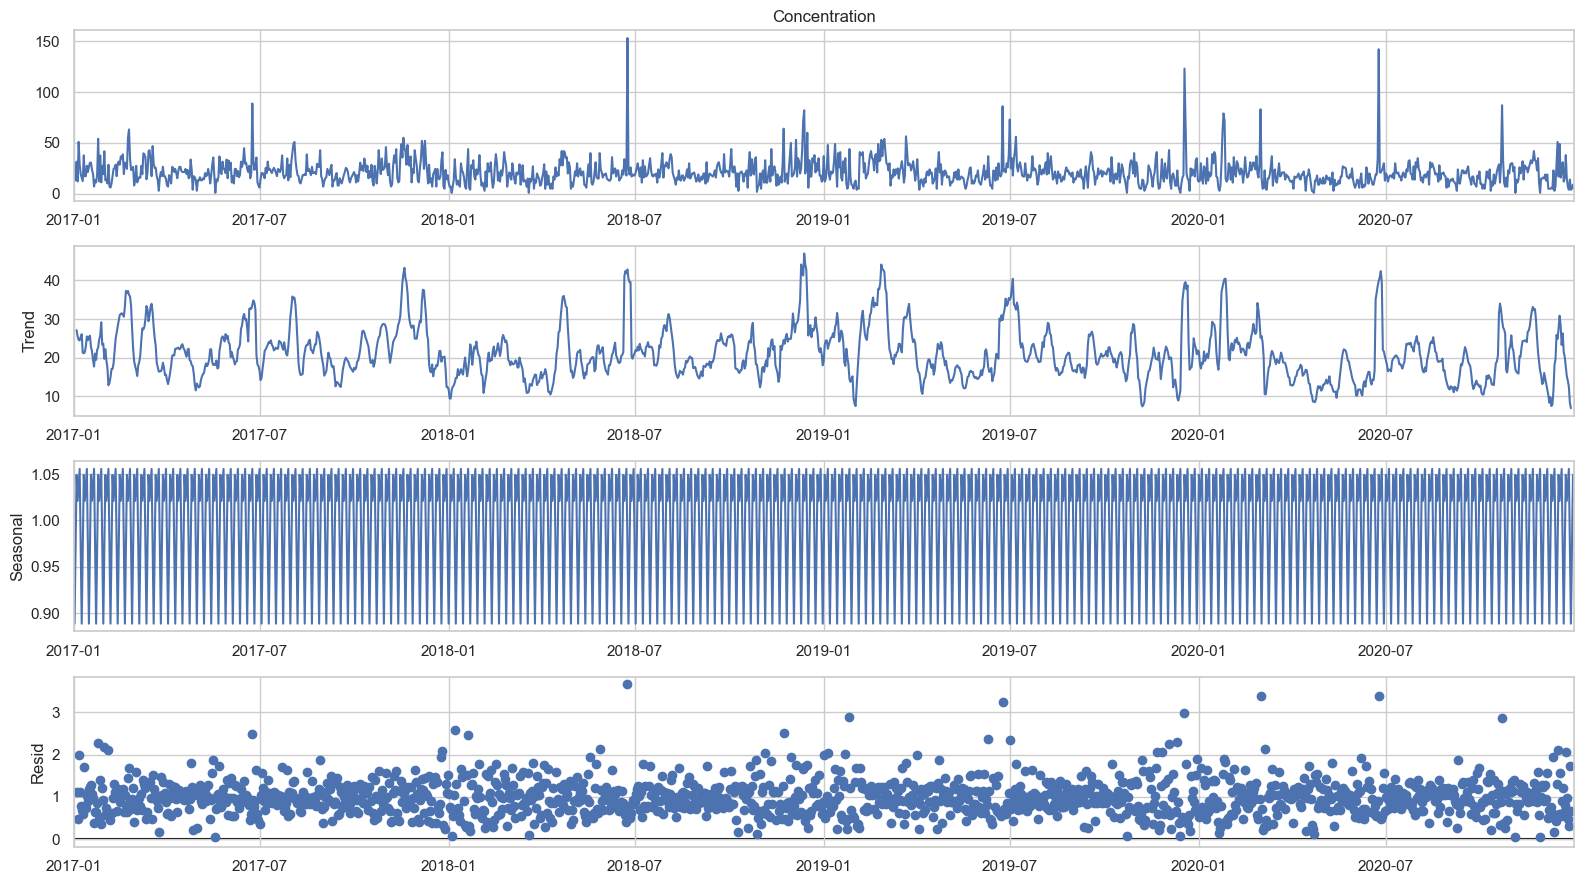

In [67]:
res = seasonal_decompose(STA_ES1684A_pm10_2017_2020['Concentration'], model="multiplicative")
res.plot();

In [72]:
STA_ES1684A_pm10_2017_2018 = STA_ES1684A_pm10_2017_2020['2017-01':'2018-01']

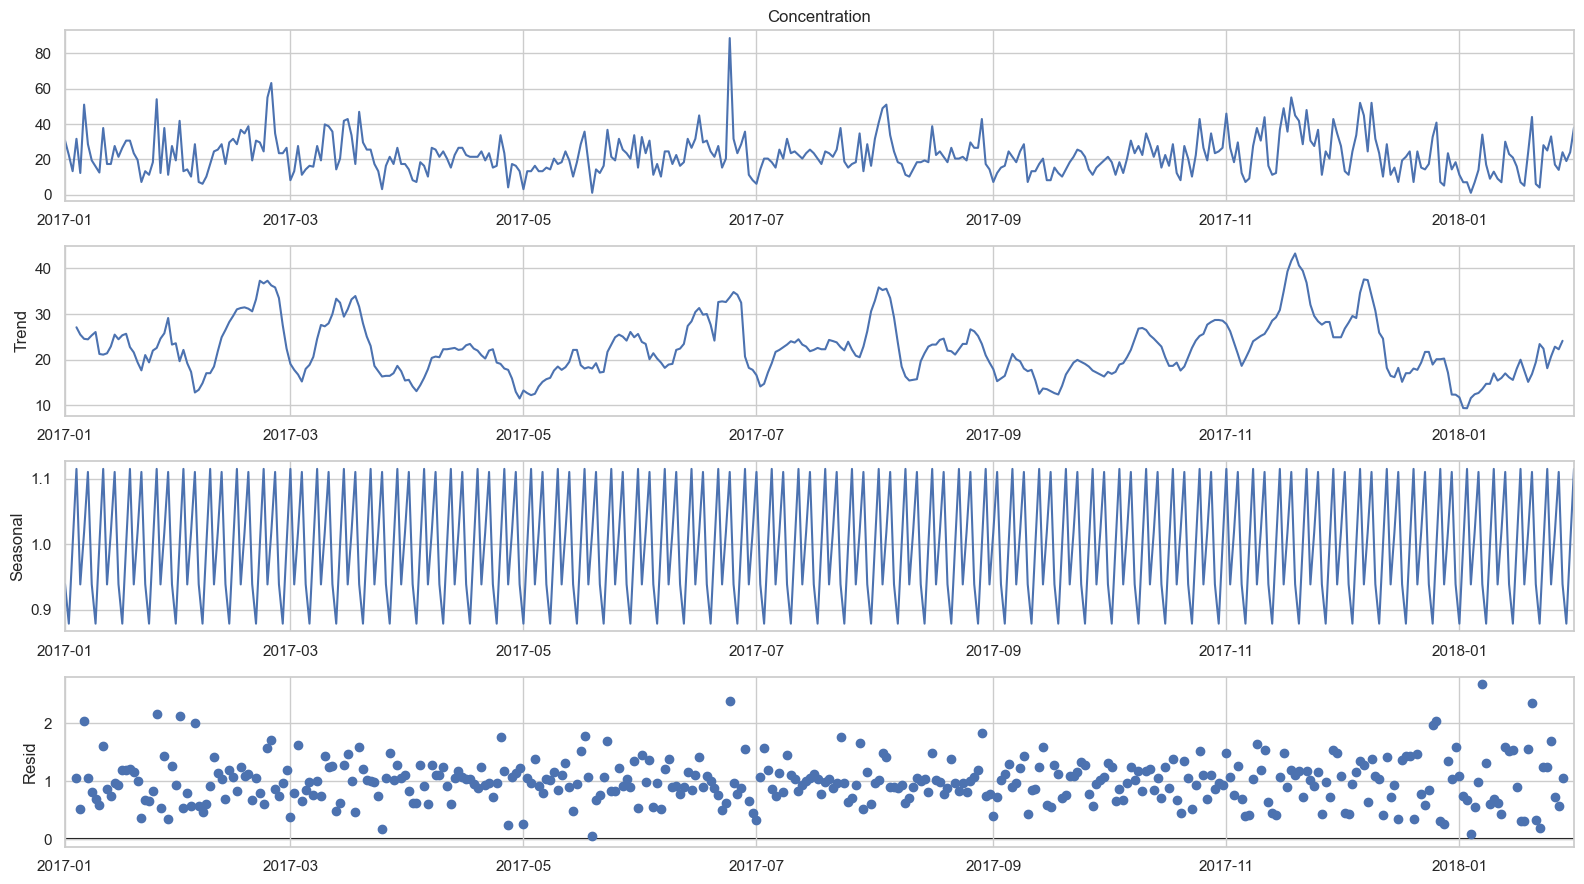

In [75]:
res = seasonal_decompose(STA_ES1684A_pm10_2017_2018['Concentration'], model="multiplicative",)
res.plot();

In [76]:
STA_ES1684A_pm10_2017_2018

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2017-01-01 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,30.60,1
2017-01-02 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,22.44,1
2017-01-03 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,13.26,1
2017-01-04 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,31.62,1
2017-01-05 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,12.24,1
...,...,...,...,...,...,...,...
2018-01-27 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,14.00,1
2018-01-28 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,24.00,1
2018-01-29 00:00:00+01:00,STA_ES1684A,ES1684A,SP_08184006_10_47,SPP_08184006_10_47.1,PM10,19.00,1


## PM10 new version

## CO

In [77]:
barcelona_EEA_co = pd.read_csv('../data/EEA/barcelona/CO/barcelona_combined_co.csv')
barcelona_EEA_co

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,SAM_08169009_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.7,mg/m3,2013-10-16 23:00:00 +01:00,2013-10-17 00:00:00 +01:00,1,1
1,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,SAM_08169009_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.6,mg/m3,2013-10-17 03:00:00 +01:00,2013-10-17 04:00:00 +01:00,1,1
2,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,SAM_08169009_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.5,mg/m3,2013-10-17 12:00:00 +01:00,2013-10-17 13:00:00 +01:00,1,1
3,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,SAM_08169009_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.4,mg/m3,2013-01-01 19:00:00 +01:00,2013-01-01 20:00:00 +01:00,1,1
4,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,SAM_08169009_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.4,mg/m3,2013-01-03 15:00:00 +01:00,2013-01-03 16:00:00 +01:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484483,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,SAM_08019057_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.2,mg/m3,2020-12-31 19:00:00 +01:00,2020-12-31 20:00:00 +01:00,1,1
484484,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,SAM_08019057_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.2,mg/m3,2020-12-31 20:00:00 +01:00,2020-12-31 21:00:00 +01:00,1,1
484485,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,SAM_08019057_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.2,mg/m3,2020-12-31 21:00:00 +01:00,2020-12-31 22:00:00 +01:00,1,1
484486,ES,ES.BDCA.AQD,NET_ES209A,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,SAM_08019057_6_48,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.2,mg/m3,2020-12-31 22:00:00 +01:00,2020-12-31 23:00:00 +01:00,1,1


In [78]:
barcelona_EEA_co.isna().sum()

Countrycode                     0
Namespace                       0
AirQualityNetwork               0
AirQualityStation               0
AirQualityStationEoICode        0
SamplingPoint                   0
SamplingProcess                 0
Sample                          0
AirPollutant                    0
AirPollutantCode                0
AveragingTime                   0
Concentration               15835
UnitOfMeasurement               0
DatetimeBegin                   0
DatetimeEnd                     0
Validity                        0
Verification                    0
dtype: int64

In [80]:
# Dropping columns to make it cleaner
columns_drop = ['Countrycode', 'Namespace', 'Sample', 'AirQualityNetwork', 'AirPollutantCode', 'AveragingTime', 'UnitOfMeasurement', 'DatetimeBegin', 'Verification']
barcelona_EEA_co_clean = clean.drop_columns(barcelona_EEA_co, columns_drop)
# Transform to datetime
barcelona_EEA_co_clean = clean.transform_datetime(barcelona_EEA_co_clean, 'DatetimeEnd')

In [82]:
barcelona_EEA_co_clean

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-10-17 00:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,CO,0.7,1
2013-10-17 04:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,CO,0.6,1
2013-10-17 13:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,CO,0.5,1
2013-01-01 20:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,CO,0.4,1
2013-01-03 16:00:00+01:00,STA_ES1983A,ES1983A,SP_08169009_6_48,SPP_08169009_6_48.1,CO,0.4,1
...,...,...,...,...,...,...,...
2020-12-31 20:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.2,1
2020-12-31 21:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.2,1
2020-12-31 22:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.2,1


<AxesSubplot:xlabel='Datetime'>

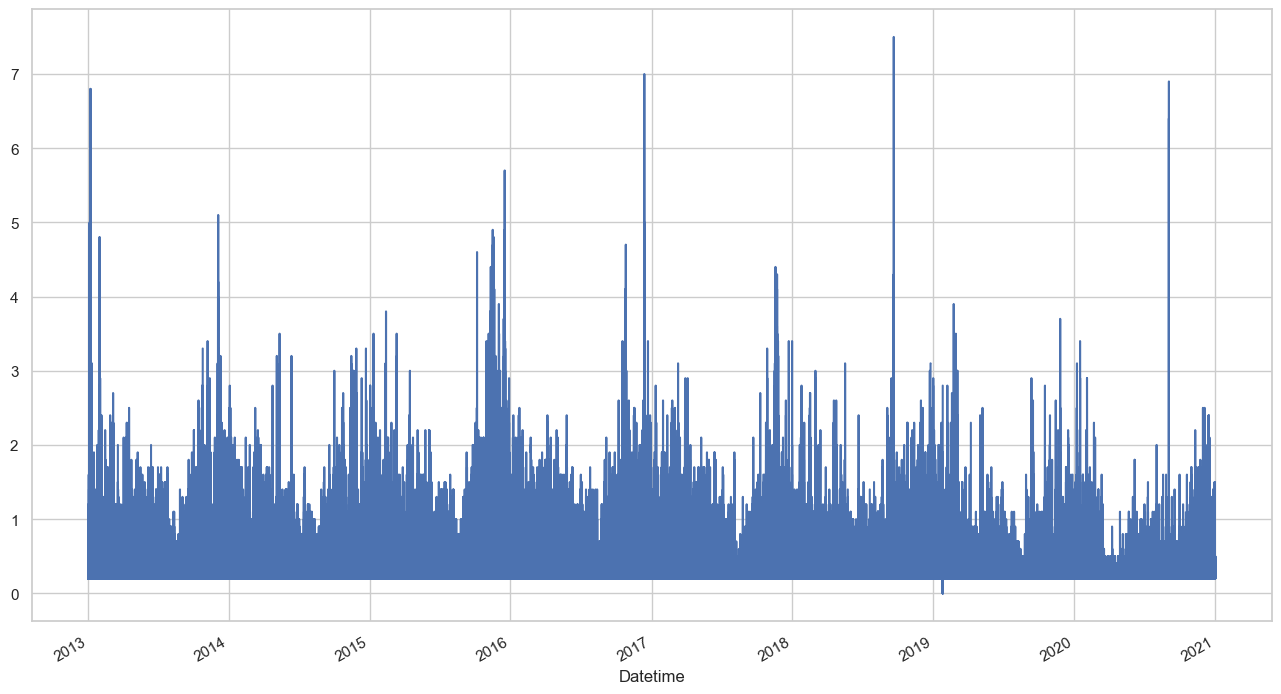

In [83]:
barcelona_EEA_co_clean['Concentration'].plot()

In [85]:
barcelona_EEA_co_clean['Concentration'] = barcelona_EEA_co_clean['Concentration'].interpolate()

In [87]:
barcelona_EEA_co_clean.isna().sum()

AirQualityStation           0
AirQualityStationEoICode    0
SamplingPoint               0
SamplingProcess             0
AirPollutant                0
Concentration               0
Validity                    0
dtype: int64

In [107]:
barcelona_EEA_co_clean.index

DatetimeIndex(['2013-01-01 02:00:00+01:00', '2013-01-01 02:00:00+01:00',
               '2013-01-01 02:00:00+01:00', '2013-01-01 02:00:00+01:00',
               '2013-01-01 02:00:00+01:00', '2013-01-01 02:00:00+01:00',
               '2013-01-01 02:00:00+01:00', '2013-01-01 03:00:00+01:00',
               '2013-01-01 03:00:00+01:00', '2013-01-01 03:00:00+01:00',
               ...
               '2020-12-31 23:00:00+01:00', '2020-12-31 23:00:00+01:00',
               '2020-12-31 23:00:00+01:00', '2021-01-01 00:00:00+01:00',
               '2021-01-01 00:00:00+01:00', '2021-01-01 00:00:00+01:00',
               '2021-01-01 00:00:00+01:00', '2021-01-01 00:00:00+01:00',
               '2021-01-01 00:00:00+01:00', '2021-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='Datetime', length=484488, freq=None)

In [92]:
pd.infer_freq(barcelona_EEA_co_clean.index)

In [97]:
barcelona_EEA_co_clean = barcelona_EEA_co_clean.sort_values(by='Datetime',ascending=True)

In [124]:
barcelona_EEA_co_clean_STA_ES1992A = barcelona_EEA_co_clean[barcelona_EEA_co_clean['AirQualityStation']=='STA_ES1992A']

In [125]:
barcelona_EEA_co_clean_STA_ES1992A.head(50)

,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,AirPollutant,Concentration,Validity
Datetime,,,,,,,
2013-01-01 02:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 03:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 04:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 05:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 06:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.5,1
2013-01-01 07:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 08:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.4,1
2013-01-01 09:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.2,1
2013-01-01 10:00:00+01:00,STA_ES1992A,ES1992A,SP_08019057_6_48,SPP_08019057_6_48.1,CO,0.2,1


In [126]:
pd.infer_freq(barcelona_EEA_co_clean_STA_ES1992A.index)

In [127]:
barcelona_EEA_co_clean_STA_ES1992A = barcelona_EEA_co_clean_STA_ES1992A.asfreq('H')

In [128]:
barcelona_EEA_co_clean_STA_ES1992A.isna().sum()

AirQualityStation           716
AirQualityStationEoICode    716
SamplingPoint               716
SamplingProcess             716
AirPollutant                716
Concentration               716
Validity                    716
dtype: int64

In [129]:
barcelona_EEA_co_clean_STA_ES1992A['Concentration'] = barcelona_EEA_co_clean_STA_ES1992A['Concentration'].interpolate()

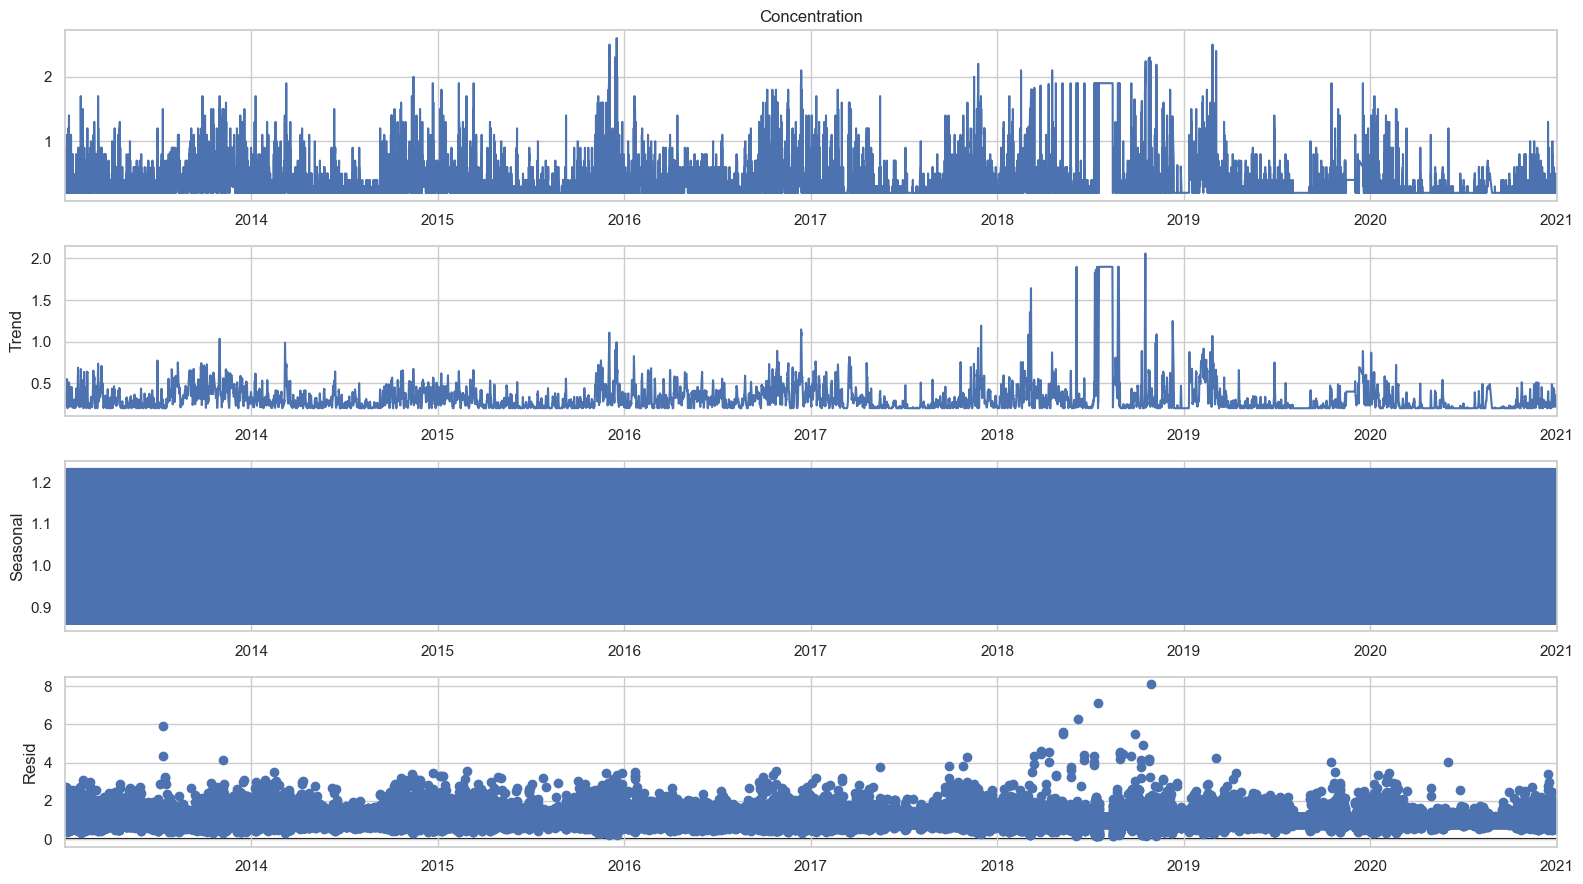

In [130]:
res = seasonal_decompose(barcelona_EEA_co_clean_STA_ES1992A['Concentration'], model="multiplicative")
res.plot();

## Barcelona (ES)

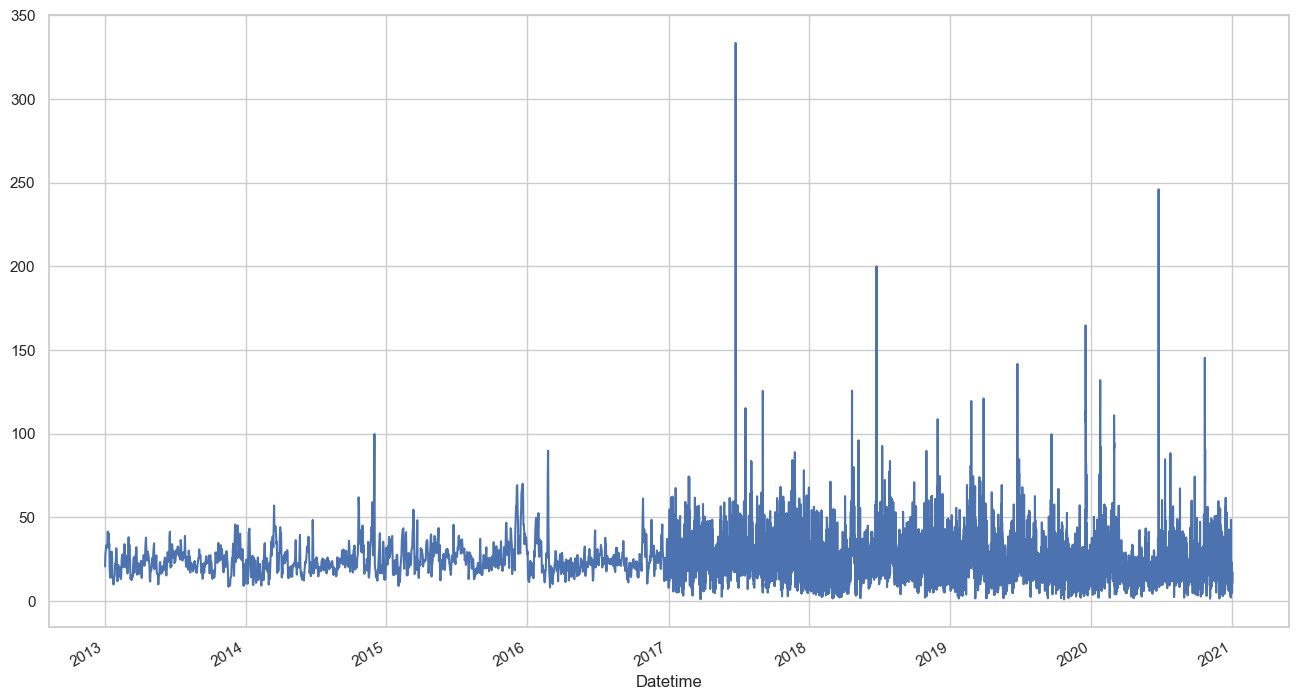

In [2]:
barcelona_EEA_pm10 = pd.read_csv('../data/EEA/barcelona/PM10/barcelona_combined_pm10.csv')
barcelona_EEA_pm10_clean = clean.average_concentration_city(barcelona_EEA_pm10,'DatetimeEnd','ES','Barcelona','PM10')
barcelona_EEA_pm10_clean['Concentration'].plot();

## Madrid (ES)

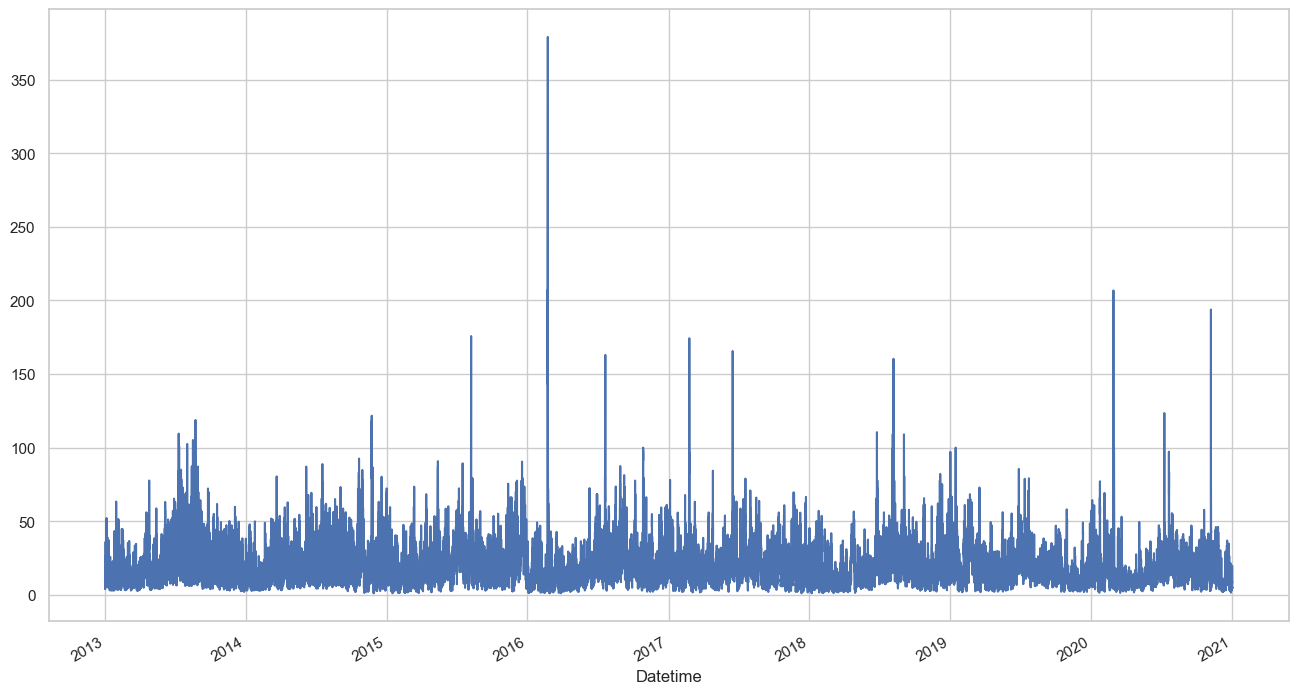

In [6]:
madrid_EEA_pm10 = pd.read_csv('../data/EEA/madrid/PM10/madrid_combined_pm10.csv')
madrid_EEA_pm10 = clean.average_concentration_city(madrid_EEA_pm10,'DatetimeEnd','ES','Madrid','PM10')
madrid_EEA_pm10['Concentration'].plot();

## London (GB)

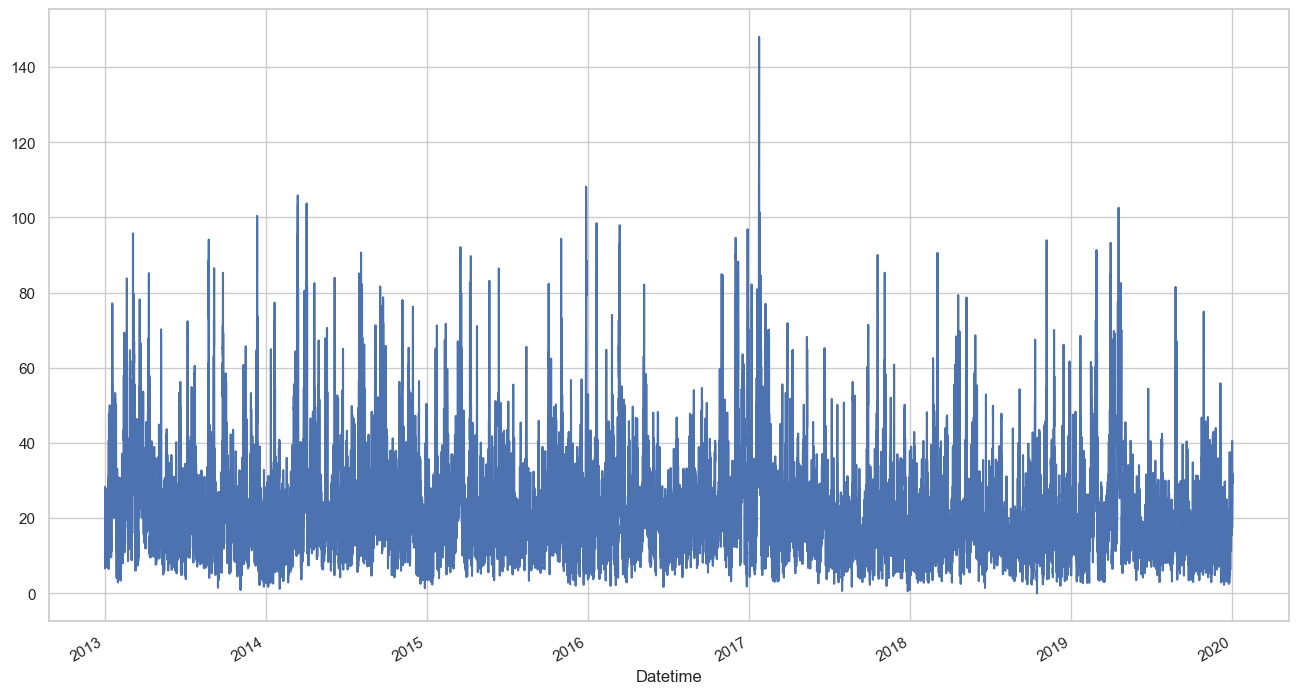

In [4]:
london_EEA_pm10 = pd.read_csv('../data/EEA/london/PM10/london_combined_pm10.csv')
london_EEA_pm10 = clean.average_concentration_city(london_EEA_pm10,'DatetimeEnd','GB','London','PM10')
london_EEA_pm10['Concentration'].plot();

## Sofia (Bulgaria)

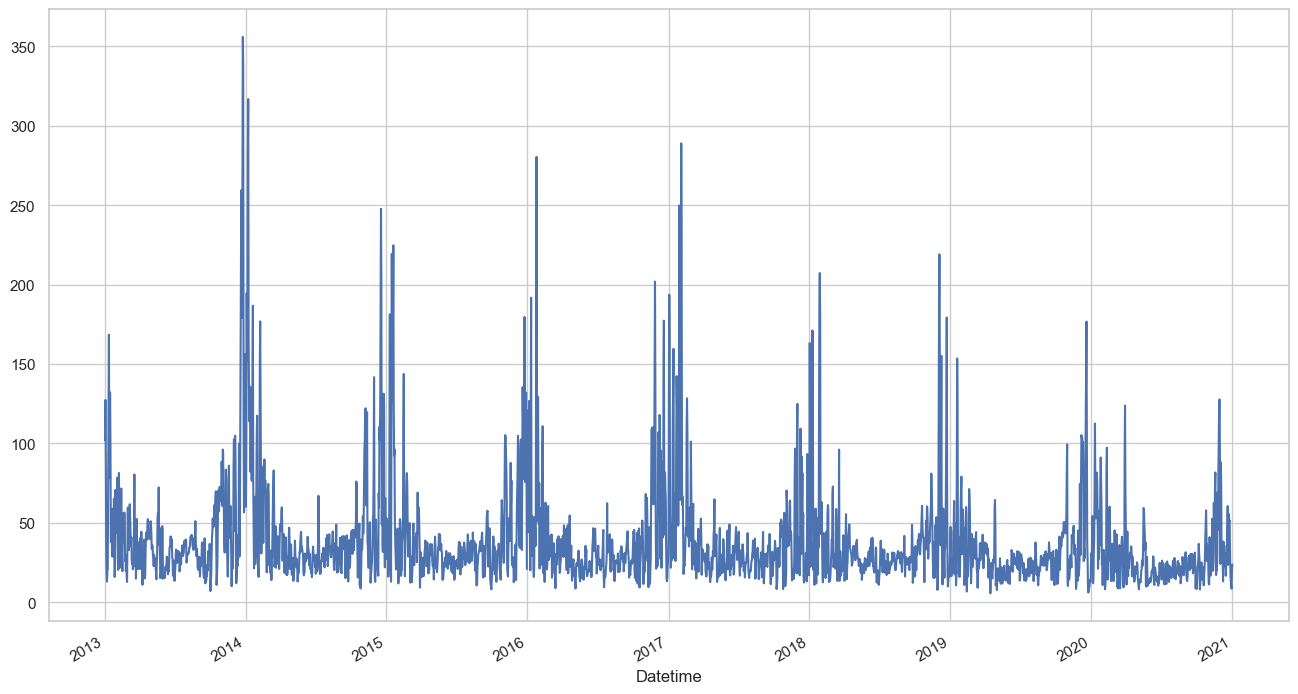

In [12]:
sofia_EEA_pm10 = pd.read_csv('../data/EEA/sofia/PM10/sofia_combined_pm10.csv')
sofia_EEA_pm10 = clean.average_concentration_city(sofia_EEA_pm10,'DatetimeEnd','BG','Sofia','PM10')
sofia_EEA_pm10['Concentration'].plot();